In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys # insert here the directory in which you have saved the file AppliedStatistics.py
sys.path.append(r"C:\Users\angelo\Documents\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"C:\Users\angelo\Documents\ownCloud\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"W:\TH-Valleriani\AngeloSynchFold\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"C:\MyDirectory\AppliedStatisticsRoutines")
import AppliedStatistics as appst
import importlib

#### References:

All exercise and data are taken from: 

Hogg, Tanis, Zimmerman, "Probability and Statistical Inference", Tenth Edition, Pearson

## Linear regression

We postulate that there exists a relationship of the kind

$$
Y\, =\, \alpha + \beta X+\epsilon
$$

between the dependent variable $Y$ and the independent variable $X$, with $\epsilon$ being the error that we assume to be $\epsilon \sim N(0,\sigma^2)$ and independent of $X$ and $Y$. Here, $\alpha$ and $\beta$ are our population parameters.

The above equation tells us that when $X$ takes a specific pre-determined value, i.e.\ $X=x$, then 

$$ 
E\left[Y\mid X=x\right]\, =\, \alpha + \beta x\, ,
$$

is called the regression line.

We will then take a sample of size $N$, $\left\{(x_1,y_1), (x_2,y_2)\, \ldots , (x_N,y_N)\right\}$, and estimate the parameters $\alpha$ and $\beta$. We will call these estimates $a$ and $b$, respectively.

These estimates are derived with the method of the least sqares, which is theoretically justified with the maximum likelihood method, under the conditions mentioned above. The values of $a$ and $b$ should be those that minimize the sum of squared residuals

$$
\sum_{i=1}^N \left(y_i - a - b x_i\right)^2\, .
$$

The regression line is given by $ \hat{y} = a+bx$, where $\hat{y}$ is the prediction and $a$ and $b$ are the estimated values for $\alpha$ and $\beta$. We have formulas for $a$ and for $b$.

$$ 
a \, =\, \bar{y} - b\bar{x}
$$

and

$$
b\, =\, \frac{\sum_i (x_i-\bar{x})(y_i-\bar{y})}{\sum_i (x_i - \bar{x})^2}\, .
$$

We can also recall that $b$ can be written in terms of the correlations coefficient $r$ as

$$
b \, = \, r \sqrt{\frac{\sum_i(y_i-\bar{y})^2}{\sum_i (x_i - \bar{x})^2}}
$$

where the linear correlation coefficient $r$ is given by

$$
r \, =\, \frac{\sum_i (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2\,\sum_i (y_i - \bar{y})^2\,}\,}\, .
$$

#### Note

The point estimate $s^2$ of the variance $\sigma^2$ for the error $\epsilon$ is given by

$$ 
s^2\, =\, \frac{1}{N-2}\sum_i\hat{\epsilon}_i^2\, ,
$$

where $N$ is the sample size.

In simple linear regression let 

$$r = \frac{\sum_i (x_i-\overline{x})(y_i - \overline{y})}{\sqrt{\sum_i (x_i-\overline{x})^2 \sum_i (y_i - \overline{y})^2}}$$

be the linear correlation coefficient. Then, since $\hat{y}_i = a + bx_i$ we have that $(\hat{y}_i - \overline{y}) = b (x_i - \overline{x})$ and therefore, the correlation coefficient can be expressed only in terms of $\hat{y}_i$, $y_i$ and $\overline{y}$ since

$$\frac{\sum_i (\hat{y}_i-\overline{y})(y_i - \overline{y})}{\sqrt{\sum_i (\hat{y}_i-\overline{y})^2 \sum_i (y_i - \overline{y})^2}} = \frac{b}{b} r = r\, .$$

Furthermore, we can define $R^2$ as

$$R^2\, =\, \frac{\sum_i (\hat{y}_i - \overline{y})^2}{\sum_i (y_i - \overline{y})^2}\, .$$

In the context of SLR and using

$$b = r\sqrt{\frac{\sum_i (y_i-\overline{y})^2}{\sum_i (x_i-\overline{x})^2}}$$

we get

$$R^2 = b^2 \frac{\sum_i (x_i-\overline{x})^2}{\sum_i (y_i-\overline{y})^2} = r^2\, .$$

Note also that in multiple linear regression, the definition of $R^2$ as

$$R^2\, =\, \frac{\sum_i (\hat{y}_i - \overline{y})^2}{\sum_i (y_i - \overline{y})^2}$$

still holds but its relationship to the linear correlation coefficient does not hold anymore. Moreover, it is also customarily to write $R^2$ in a different but equivalent form

$$R^2\, =\, 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \overline{y})^2}\, ,$$

by also saying that the last term on the rhs is the proportion of total variability left unexplained. 

#### Exercise 30

A guy interested in cars has collected the following data about 14 different cars by listing their horse power (HP), the time from 0 to 60 mph and the weights in pounds.

This guy is interested in finding out which of the two given variables HP or Weight has the stronger effect on the time 0-60 (y).

In [10]:
#6.5.5
data = pd.read_csv("Exercise30.csv") 
data

HP  0-60  Weight
0   230   8.1    3516
1   282   6.2    3627
2   225   7.8    3690
3   300   6.4    3892
4   375   4.7    2976
5   220   7.7    3377
6   322   6.6    4215
7   250   7.0    3625
8   190   8.4    3761
9   315   5.3    3230
10  150   8.4    2940
11  200   6.2    2657
12  178   7.2    2818
13  300   5.5    3518

In [11]:
time = np.array(data["0-60"])
hp = np.array(data["HP"])
weight = np.array(data["Weight"])
N = len(time)
print("The sample size is N = ", N)

The sample size is N =  14


We start by writing down a general formula for the regression coefficients.

In [12]:
y = time.copy()
x = hp.copy()

The estimated regression coefficients are:
a =  10.6095
b =  -0.015
The two-sided 95.0% confidence interval for b is: [-0.0216, -0.0084]


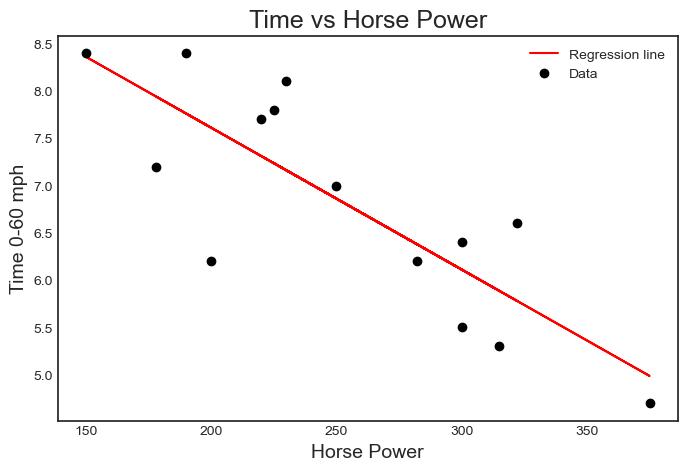

In [13]:
x_bar = np.mean(x)
y_bar = np.mean(y)
s_x = np.std(x)
s_y = np.std(y)
cov_xy = np.sum((x-x_bar)*(y-y_bar))/N # np.cov(x,y)[0,1]
b = cov_xy/(s_x**2)
a = y_bar - b*x_bar
print("The estimated regression coefficients are:")
print("a = ", round(a,4))
print("b = ", round(b,4))
# *** REGRESSION LINE
y_hat = a+b*x
# *** FIND THE VARIANCE ASSOCIATED TO b ***
s2 = np.sum((y-y_hat)**2)
s2_x = np.sum((x-x_bar)**2)
s2_b = s2/((N-2)*s2_x)
s_b = np.sqrt(s2_b)
# *** FIND THE CONFIDENCE INTERVAL FOR b
from scipy.stats import t as t_dist
eta = 0.05
t_a2 = -t_dist.ppf(eta/2,N-2)
err = t_a2*s_b
b_low = b - err
b_upp = b + err
print("The two-sided "+str((1-eta)*100)+"% confidence interval for b is:", [round(b_low,4), round(b_upp,4)])


plt.figure(figsize=(8,5))
plt.plot(x,y_hat,'-r', label = "Regression line")
plt.plot(x,y,'ok', label = "Data")
plt.xlabel("Horse Power", fontsize = 14)
plt.ylabel("Time 0-60 mph", fontsize = 14)
plt.title("Time vs Horse Power", fontsize = 18)
plt.legend(loc='best')
plt.show()

In [14]:
y = time.copy()
x = weight.copy()

The estimated regression coefficients are:
a =  5.47
b =  0.0004
The two-sided 95.0% confidence interval for b is: [-0.0013, 0.002]


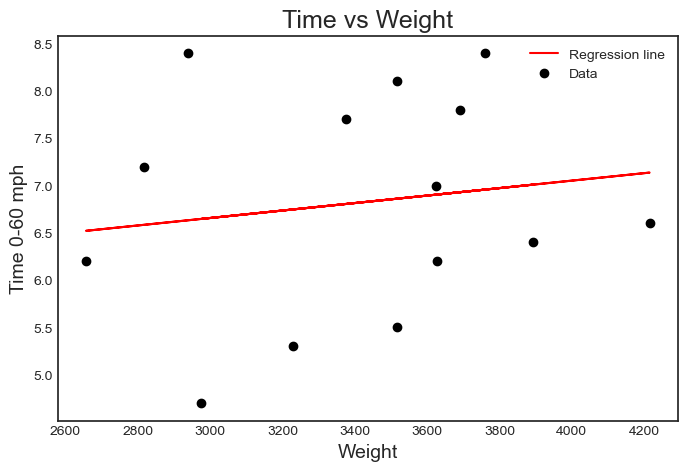

In [15]:
x_bar = np.mean(x)
y_bar = np.mean(y)
s_x = np.std(x)
s_y = np.std(y)
cov_xy = np.sum((x-x_bar)*(y-y_bar))/N 
b = cov_xy/(s_x**2)
a = y_bar - b*x_bar
print("The estimated regression coefficients are:")
print("a = ", round(a,2))
print("b = ", round(b,4))


# *** REGRESSION LINE
y_hat = a+b*x
# ***

# *** FIND THE VARIANCE ASSOCIATED TO b ***
s2 = np.sum((y-y_hat)**2)
s2_x = np.sum((x-x_bar)**2)
s2_b = s2/((N-2)*s2_x)
s_b = np.sqrt(s2_b)
# *** FIND THE CONFIDENCE INTERVAL FOR b
from scipy.stats import t as t_dist
eta = 0.05
t_a2 = -t_dist.ppf(eta/2,N-2)
err = t_a2*s_b
b_low = b - err
b_upp = b + err
print("The two-sided "+str((1-eta)*100)+"% confidence interval for b is:", [round(b_low,4), round(b_upp,4)])


plt.figure(figsize=(8,5))
plt.plot(x,y_hat,'-r', label = "Regression line")
plt.plot(x,y,'ok', label = "Data")
plt.xlabel("Weight", fontsize = 14)
plt.ylabel("Time 0-60 mph", fontsize = 14)
plt.title("Time vs Weight", fontsize = 18)

plt.legend(loc='best')
plt.show()

Using the routine we can also predict what would be the range of values when x = 350

In [16]:
y = time.copy()
x = hp.copy()
results_hp = appst.lin_reg(X=x,Y=y, x_pred = 350, x_label="Horse power", y_label = "Time 0-60", verbose =True)

The point estimate of the intercept is:  10.609
The t-interval for the intercept is:  [8.901, 12.318]
The point estimate of the slope is:  -0.015
The t-interval for the slope is:  [-0.022, -0.008]
The point estimate of the variance is: 0.492
The confidence interval for the variance is: [0.253, 1.341]
The correlation coefficient is:  -0.821
The two-sided 95.0% confidence interval for the correlation coefficient is: [-0.941, -0.514]
The confidence level is:  0.05


At the position 350 the mean value of the regression line is 5.362
At the position 350 the lower and upper predictions of the mean are 4.603 and 6.12
At the position 350 the lower and upper predictions for the values are 3.655 and 7.068


## Conclusions

In this routine you have seen how to implement one statitical model called the simple linear regression model. 

The most powerful results of this model rely on the assumption of the normal distribution of the error. This can be checked by analysing the residuals.

Simple linear regression is a simple model but very powerful because it can be applied to many situations. 